## Project - Street Sign Detector - Identifying street signs on Irish roads

For our project we wanted to do an original idea. After some deliberation over various ideas, some which were more difficult than others, we found our idea! Our project focuses on recognizing Irish street signs such as speed limits and stop signs. 

The Process of the Program goes as follows:

- The User is prompted to select an Image to for testing to see what type of sign it is.
- The Area of the image that contains the road sign is extracted.
- We find the contour of the road sign that has been extracted for the purposes of testing.
- The extracted ROI is tested to see what type of sign it is. If the result is very close to 0 and is the smallest in comparison to the other tests than it is most likely that type of sign. Otherwise, it probably isn't a road sign.

    Authors: Declan Thorne (C1742592), Philip Toolan (C17433026), Conor Monahan (C16475956)
                                      
                                      Date: 27/11/2020

### Importing libraries for Image Processing

We researched into existing methods of importing libraries and information regarding the libraries. Some good handy back pedaling gave us a better understanding of the libraries we used.

**References:**
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
- https://docs.python-guide.org/scenarios/imaging/
- https://medium.com/towards-artificial-intelligence/image-processing-libraries-in-python-b2c6a7627686
- PythonStarterPack.ipynb

In [1]:
# Specifying Jupyter Notebook.
%matplotlib inline
import cv2 # The OpenCV library.
import numpy as np # Helpful when working with arrays.
from matplotlib import pyplot as plt # Good for graphing.
from matplotlib import image as image  # Matplotlib is mostly used for 2D visualisations.
import easygui # easygui is used for allowing an image to be loaded in from file explorer.

### Function -  display_img
### Displaying the Image

This is a simple function to display the image in a larger scale using MatplotLib in Jupyter Notebook.

**References:**
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
- https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html

In [2]:
def display_img(img): # Defining the function 'display_img' with the argument img passed in.
    fig = plt.figure(figsize=(12,10)) # Creates a new figure.
    ax = fig.add_subplot(111) # Add a subplot to the current figure.
    ax.imshow(img) # Displaying the image in Greyscale.

### Function 
### Extracting the Region of Interest in an Image for a given

Select an image for testing. Finding where the road sign in the image is and extracting it.

**Choosing an Appropriate Colour Space**

If an image has a street sign here is where it will be detected. The processes first step is converting the image to HSV. After testing in other colour spaces we settled on HSV (Hue, Saturation & Value (or Intensity).  We picked HSV as it is very good at seeing contrasts in images. Since Street Signs typically stand out in an image because of their shape and colour, this colour space proves very useful for accurate segmentation.

**Equalisation**

Following on, equalisation is performed on the V channel. Equalisation can only operate correctly on a single channel. We used equalisation on the V channel to improve the contrast of the Y channel which in turn improves the accuracy of segmentation with any sample image. 

**Segmentation - Multiple Thresholds, ROI, Declaring Values for the colour Red, Masking**

Since we are looking for the colour red in an image that will match a street sign we need varying degrees of the colour red (bright red and dark red) so that the accuracy of the threshold for picking up the region of interest (street sign) is high. When we pick a threshold we need to focus on seperating the region of interest from the background. 

By setting the colours to a low red and a high red we decided on a inbetween of inclusivity and exclusivity so that it works with as many sample images as possible without having to adjust the colour numbers constantly. We will not have priori knowledge of each test image so we did some satistical analysis by trying it out varying sized thresholds on a number of images to conclude making any adjustments to the threshold that was needed.

Since we have 4 values for finding red we used the inRange function as it allows for the utilization of multiple thresholds. When then added these two inRange outputs to build a compound masks giving us a single total region of interest.

We use the bitwise_and function to extract the region of interest with the mask 'mask'. The output is of an image and if a sign is in the image it is extracted.

**References:**
    
- https://realpython.com/python-opencv-color-spaces/
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
- https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html
- https://people.ece.cornell.edu/acharya/papers/mlt_thr_img.pdf
- https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html
- https://stackoverflow.com/questions/12204522/efficiently-threshold-red-using-hsv-in-opencv
- https://stackoverflow.com/questions/44333605/what-does-bitwise-and-operator-exactly-do-in-opencv
- https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html

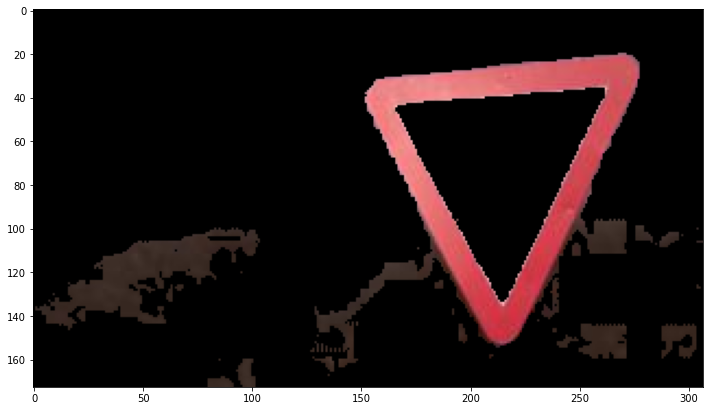

In [3]:
file = easygui.fileopenbox() # Easy gui opens file explorer to select an image.
I = cv2.imread(file) # Please, select yield.png or 100kmh.png from the repository for testing.

HSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV) # HSV is the image I in the colour space HSV.

HSV[:, :, 2] = cv2.equalizeHist(HSV[:, :, 2]) # Extracting all the Columns and Rows of the V channel of V and equalising them.

            # Hue # Saturation # Value
low_red_1 = (0, 70, 60) # This is a low red colour.
high_red_1 = (10, 255, 255) # This is a high red colour.
low_red_2 = (170, 70, 60) # This is a low red colour.
high_red_2 = (180, 255, 255) # This is a high red colour.


#light_red = (170, 70, 60)
#dark_red = (180, 255, 255)

#mask = cv2.inRange(HSV, low_red, dark_red)

mask1 = cv2.inRange(HSV, low_red_1, high_red_1) # This mask will only return pixels that fall within the range of low_red_1 & high_red_1. 
mask2 = cv2.inRange(HSV, low_red_2, high_red_2) # This mask will only return pixels that fall within the range of low_red_2 & high_red_2.
mask = mask1 + mask2 # Combining mask 1 & mask 2.

result = cv2.bitwise_and(I, I, mask=mask) # Extracting the ROI by applying the mask on 'I' using bitwise_and function.

resultout = cv2.cvtColor(result, cv2.COLOR_BGR2RGB) # Converting the ROI to from BGR to RGB for displaying with matplotlib.

# plt.imshow(mask, cmap="gray")
# plt.show()
display_img(resultout)

### Finding the Contour

Finding the largest contour from the region of interest. Saving it for testing.

**Kernel**

Many operations in Image Processing are achieved by applying a filter or kernel to the image. It's a small little set of weights which are used on each pixel in the image to make that pixel a weighted sum of its neighbours. In other words, this is an operator which makes each pixel a weighted sum of its neighbours. This process is called convolution. The Kernel moves from left to right affecting each individual pixel and has made a weighted sum of its neighbors.

We had a few options when it came to which kernel to use. One option we tried was Gaussian Smoothing Kernel. It's a weighted average where you give the most importance to the center pixel. It soften and smooths the image so we don't have such distinction between pixels.

After testing we opted for a High Pass Filter. To Build a Kernel in OpenCV we use the Numpy Array Function. And to Apply it we used the filter2D Function.

**Filter**

We used a high pass filter. It Accentuates texture and for sharpening the image. Gives a high/heavy value for pixels that are very different from their neighbours & for high textures. Subtraction is a measure of difference. So if you take the center pixel, the one that we are changing the value of and subtract all its neighbours. It will only give you a high result if that pixel is very different from its neighbours. Seen as a bad filter because it accentuates noise. But used a lot for sharpening because it leaves a good effect.

**Edge Detection - Canny**

An edge detector should return a result of "edge" (True) or "not an edge" (False) for every pixel in the image. The easiest step from a gradient to an edge detector is by thresholding. We used Canny to extract the edges of the ROI. Canny is useful for setting the upper and lower thresholds.

**Dilation**

As it's name suggests dilation dilates (expands) the ROI. This is achieved by shaving away the background of the ROI using a razor in the shape of the structuring element. This is useful for smoothing boundaries and filing gaps in the ROI. However, in dilating, it is important not to accentuate unwanted blobs. If we want a small unwanted blop we will make it significantly bigger with dilation.

**Contours**

The purpose of contour extraction is to find features that describe the shape of an object. The main features of interest are the area and length but others including the orientation and centroid can also be found. These can help us identify the contour of interest (typically longest and biggest) and can tell us something about the shape of the object.

**References:**
    
- https://towardsdatascience.com/basics-of-kernels-and-convolutions-with-opencv-c15311ab8f55
- https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
- https://stackoverflow.com/questions/39685757/how-to-make-a-new-filter-and-apply-it-on-an-image-using-cv2-in-python2-7
- https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
- https://www.tutorialspoint.com/opencv/opencv_canny_edge_detection.htm
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
- https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html
- https://towardsdatascience.com/edges-and-contours-basics-with-opencv-66d3263fd6d1

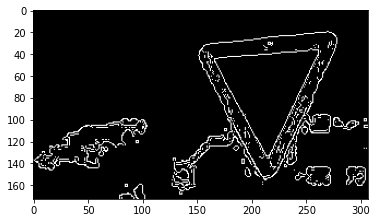

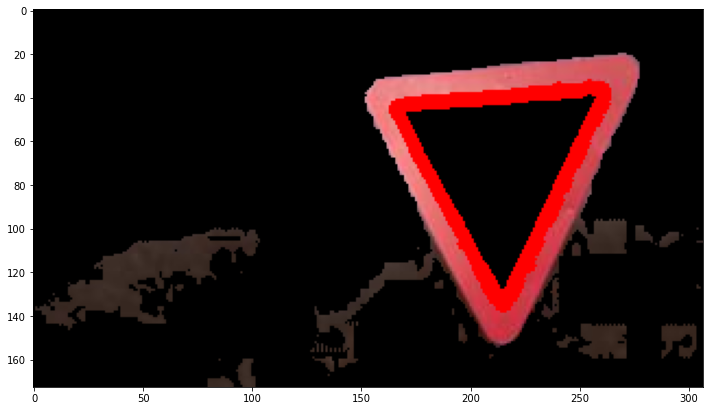

In [4]:
#sharpen image
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=float) # Sharpening kernel used to sharpen the image.

#apply kernel to image - ddepth is the bit depth of the output image (e.g 8-bit).
Filter = cv2.filter2D(result, ddepth = -1, kernel=kernel) # This is a filter that applies the kernel to the image.
#edge detection
Edge = cv2.Canny(Filter, threshold1=100, threshold2=200) # Now, canny is being used on the image.

plt.imshow(Edge, cmap = "gray")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))  # Returns a structuring element of the specified size and shape for dilation.
dilated = cv2.dilate(Edge, kernel) # Dilates an image
contours, _ = cv2.findContours(Edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # Used to find all the contours from the image.
ListOfContours = sorted(contours, key = cv2.contourArea, reverse = True) # Orders the contours in order of size from bigger to smaller (using either length or area).

contour = ListOfContours[0] # At index [0] the largest contour is stored, with the smallest being at [-1].
ContourImage = cv2.drawContours(result, contour, contourIdx = -1, color = (0,0,255), thickness = 5)  # Draws the largest contour onto the image.
#hull = cv2.convexHull(contour) 
#ContourImage = cv2.polylines(ContourImage, pts = hull, isClosed = True, color = (0, 0,255), thickness = 5)
ContourImage = cv2.cvtColor(ContourImage, cv2.COLOR_BGR2RGB) # Converting the image from BGR to RGB for displaying in matplotlib.

display_img(ContourImage)

### Function - Canny
### Function for testing the ROI to see what type of Road Sign it is

**Kernel**

Many operations in Image Processing are achieved by applying a filter or kernel to the image. It's a small little set of weights which are used on each pixel in the image to make that pixel a weighted sum of its neighbours. In other words, this is an operator which makes each pixel a weighted sum of its neighbours. This process is called convolution. The Kernel moves from left to right affecting each individual pixel and has made a weighted sum of its neighbors.

We had a few options when it came to which kernel to use. One option we tried was Gaussian Smoothing Kernel. It's a weighted average where you give the most importance to the center pixel. It soften and smooths the image so we don't have such distinction between pixels.

After testing we opted for a High Pass Filter. To Build a Kernel in OpenCV we use the Numpy Array Function. And to Apply it we used the filter2D Function.

**Filter**

We used a high pass filter. It Accentuates texture and for sharpening the image. Gives a high/heavy value for pixels that are very different from their neighbours & for high textures. Subtraction is a measure of difference. So if you take the center pixel, the one that we are changing the value of and subtract all its neighbours. It will only give you a high result if that pixel is very different from its neighbours. Seen as a bad filter because it accentuates noise. But used a lot for sharpening because it leaves a good effect.

**Edge Detection - Canny**

An edge detector should return a result of "edge" (True) or "not an edge" (False) for every pixel in the image. The easiest step from a gradient to an edge detector is by thresholding. We used Canny to extract the edges of the ROI. Canny is useful for setting the upper and lower thresholds.

**Dilation**

As it's name suggests dilation dilates (expands) the ROI. This is achieved by shaving away the background of the ROI using a razor in the shape of the structuring element. This is useful for smoothing boundaries and filing gaps in the ROI. However, in dilating, it is important not to accentuate unwanted blobs. If we want a small unwanted blop we will make it significantly bigger with dilation.

**Contours**

The purpose of contour extraction is to find features that describe the shape of an object. The main features of interest are the area and length but others including the orientation and centroid can also be found. These can help us identify the contour of interest (typically longest and biggest) and can tell us something about the shape of the object.


In [5]:
'''This Function makes sure that an actual sign has been found.'''
def squareTest() : 
    img = cv2.imread('TestSquare.png',0) # Reading in image 'TestSquare.png' in greyscale.

    contours,hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # Used to find all the contours from the image.
    ListOfComparisonContours = sorted(contours, key = cv2.contourArea, reverse = True) # Orders the contours in order of size from bigger to smaller (using either length or area).
    cnt1 = ListOfComparisonContours[0] # Setting the variable to cnt1 to hold the largest contour.

    ContourImage = cv2.drawContours(img, cnt1, contourIdx = -1, color = (0,0,255), thickness = 5) #Drawing the largest contour on the image.

    test_square = cv2.matchShapes(contour, cnt1, 1, 0.0)
    print( "The Result of testing the input image as a was {}".format(test_square) ) # Printing the results.
    return test_square # Returning the result for more testing.

In [6]:
'''This Function tests the image to see if it is a speed test sign.'''
def speedTest() :
    img = cv2.imread('circle1.jpg',0) # Reading in image 'circle1.jpg' in greyscale.

    contours,hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # Used to find all the contours from the image.
    ListOfComparisonContours = sorted(contours, key = cv2.contourArea, reverse = True) # Orders the contours in order of size from bigger to smaller (using either length or area).
    cnt2 = ListOfComparisonContours[0] # Setting the variable to cnt1 to hold the largest contour.

    ContourImage = cv2.drawContours(img, cnt2, contourIdx = -1, color = (0,0,255), thickness = 5) #Drawing the largest contour on the image.

    speed_sign = cv2.matchShapes(contour, cnt2, 1, 0.0)
    print( "The Result of testing the input image as a speed sign was {}".format(speed_sign) ) # Printing the results.
    return speed_sign # Returning the result for more testing.

In [7]:
'''This Function tests the image to see if it is a yield test sign.'''
def yieldTest() :
    img = cv2.imread('yieldtest.jpg',0) # Reading in image 'yieldtest.jpg' in greyscale.

    contours,hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # Used to find all the contours from the image.
    ListOfComparisonContours = sorted(contours, key = cv2.contourArea, reverse = True) # Orders the contours in order of size from bigger to smaller (using either length or area).
    cnt3 = ListOfComparisonContours[0] # Setting the variable to cnt1 to hold the largest contour.

    ContourImage = cv2.drawContours(img, cnt3, contourIdx = -1, color = (0,0,255), thickness = 5) #Drawing the largest contour on the image.
    ContourImage = cv2.cvtColor(ContourImage, cv2.COLOR_BGR2RGB)

    yield_sign = cv2.matchShapes(contour, cnt3, 1, 0.0)
    print( "The Result of testing the input image as a yield sign was {}".format(yield_sign) ) # Printing the results.
    return yield_sign # Returning the result for more testing.

### Testing

Now the result of the images will be printed. If the result is less than 0.0 than it is most likely that sign.

In [8]:
test_square = squareTest()
speed_sign = speedTest()
yield_sign = yieldTest()

The Result of testing the input image as a was 0.1667309945229432
The Result of testing the input image as a speed sign was 0.23260194711895082
The Result of testing the input image as a yield sign was 0.07851122787402842


In [9]:
if test_square < yield_sign and test_square < speed_sign:
    print( "Could not match sign" )
    
if speed_sign < yield_sign and speed_sign < test_square:
    print( "Identified Speed Sign" )
    
if yield_sign < speed_sign and yield_sign < test_square:
    print ( "Identified Yield Sign" )

Identified Yield Sign
